## Final Activity 1

#### Objectives:
- Develop regression models for a given dataset and interpret the regression models.
- Evaluate the regression models based on the regression metrics.

#### Simple Linear Regression (SLR)

Predict how much discount should be given considering any damage in the house. The dataset has a column for number of damages and another column for the discount that can be given (around USD 1 for every damage discovered)

#### Multiple Linear Regression (MLR)

Predict the possible price of a house by correlating the price column with ONLY the following attributes/columns in the dataset:
- size (in square meters)
- number of bedrooms
- number of bathrooms
- number of extra rooms
- presence of a garage (0 - no, 1- yes)
- presence of a garden (0 - no, 1- yes)
- if the house is in a subdivision (0 - no, 1- yes)
- if the house is located in a city (0 - no, 1- yes)
- if the house is solar powered (0 - no, 1- yes)

In [167]:
# Import Dataset
import pandas as pd
import numpy as np

raw = pd.read_csv('data/housePriceData.csv')

raw

,size,bedrooms,bathrooms,extraRooms,garage,garden,inSubdivision,inCity,solarPowered,price,damages,discount
0,164,2,2,3,0,0,0,1,1,43800,77,79.775152
1,84,2,4,2,0,1,1,0,1,37550,21,23.177279
2,190,2,4,2,1,0,0,1,0,49500,22,25.609262
3,75,2,4,1,0,1,1,1,1,50075,20,17.857388
4,148,1,2,2,1,1,0,0,1,52400,36,41.849864
...,...,...,...,...,...,...,...,...,...,...,...,...
295,234,2,5,1,0,0,0,0,0,27600,71,68.545888
296,73,1,3,2,1,1,0,0,0,46825,46,47.334876
297,32,3,5,3,1,0,0,1,1,55750,55,54.090637
298,118,3,1,3,0,0,1,0,1,28400,62,63.297171


### Separate columns and split train-test data

In [168]:
from sklearn.model_selection import train_test_split

# Separate columns by model
slr_features = raw[['damages']].copy()
slr_target = raw['discount'].copy()
mlr_features = raw[['size', 'bedrooms', 'bathrooms', 'extraRooms', 'garage', 'garden', 'inSubdivision', 'inCity',
                    'solarPowered']].copy()
mlr_target = raw['price'].copy()

slr_features_train, slr_features_test, slr_target_train, slr_target_test = train_test_split(
    slr_features, slr_target, test_size=0.1
)

mlr_features_train, mlr_features_test, mlr_target_train, mlr_target_test = train_test_split(
    mlr_features, mlr_target, test_size=0.1
)

## Simple Linear Regression

a. Display the descriptive statistics of the discount amounts

In [169]:
discount_stats = slr_features_train.describe()
print("Descriptive Statistics for Discount Amounts:")
discount_stats

Descriptive Statistics for Discount Amounts:


,damages
count,270.000000
mean,50.970370
std,28.964134
min,0.000000
25%,27.000000
50%,53.500000
75%,73.750000
max,100.000000


b. Create a scatter plot using the “damages” column as the independent variable and the “discount” column as the dependent variable.

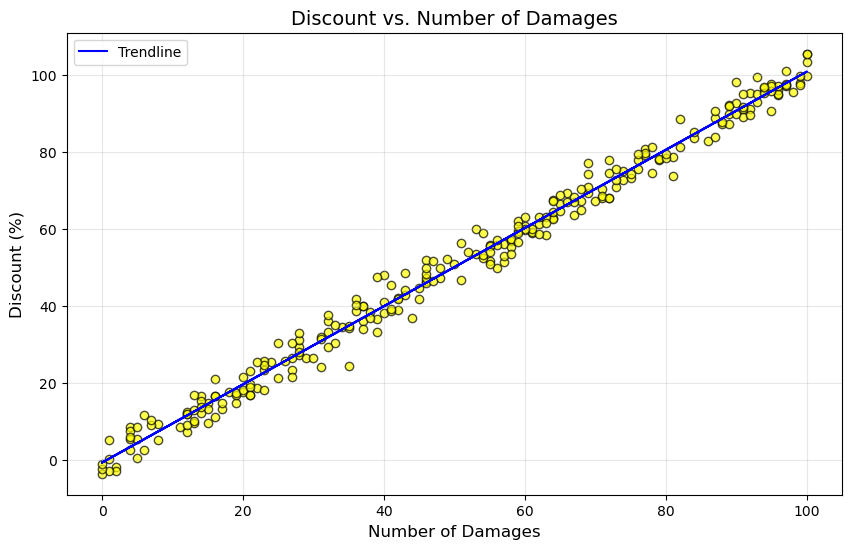

In [170]:
import matplotlib.pyplot as plt

slr_train_data = pd.concat([slr_features_train, slr_target_train], axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(slr_train_data['damages'], slr_train_data['discount'], color='yellow', edgecolor='black', alpha=0.7)
plt.title('Discount vs. Number of Damages', fontsize=14)
plt.xlabel('Number of Damages', fontsize=12)
plt.ylabel('Discount (%)', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.3)

z = np.polyfit(slr_train_data['damages'], slr_train_data['discount'], 1)
p = np.poly1d(z)
plt.plot(slr_train_data['damages'], p(slr_train_data['damages']), color='blue', linestyle='-', label='Trendline')

plt.legend()
plt.show()

c. Determine the correlation between the “damages” and “discount” columns.

In [171]:
correlation = slr_train_data[['damages', 'discount']].corr().iloc[0, 1]
print(f"Correlation between Damages and Discount: {correlation:.2f}")

Correlation between Damages and Discount: 0.99


d. Create a simple linear regression model using the “damages” column as the independent variable and the “discount” column as the dependent variable.

In [172]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
slr_model = LinearRegression()
slr_model.fit(slr_features_train, slr_target_train)

# Get the slope (coefficient) and intercept
slope = slr_model.coef_[0]
intercept = slr_model.intercept_

print(f"SLR Equation: discount = {intercept:.2f} + {slope:.2f} * damages")
print(f"Slope (damages coefficient): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

SLR Equation: discount = -0.56 + 1.01 * damages
Slope (damages coefficient): 1.01
Intercept: -0.56


e. Evaluate the developed regression model based on different performance metrics and discuss the OLS regression results.

In [173]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Predict on test data
slr_predictions = slr_model.predict(slr_features_train)

# Calculate metrics
slr_mae = mean_absolute_error(slr_target_train, slr_predictions)
slr_mse = mean_squared_error(slr_target_train, slr_predictions)
slr_rmse = root_mean_squared_error(slr_target_train, slr_predictions)

print(f"MAE: {slr_mae:.2f}")
print(f"MSE: {slr_mse:.2f}")
print(f"RMSE: {slr_rmse:.2f}")

MAE: 2.44
MSE: 9.43
RMSE: 3.07


In [174]:
# OLS Regression
import statsmodels.api as sm

# Add a constant (intercept) to the features
slr_X_train = sm.add_constant(slr_features_train)
slr_ols_model = sm.OLS(slr_target_train, slr_X_train).fit()

# Print OLS summary
slr_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               discount   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.446e+04
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.41e-265
Time:                        18:28:19   Log-Likelihood:                -686.10
No. Observations:                 270   AIC:                             1376.
Df Residuals:                     268   BIC:                             1383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5575      0.380     -1.466      0.144      -1.306       0.191
damages        1.0149      0.006    156.383      0.000       1.002       1.028
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.044
Skew:                           0.138   Prob(JB):                        0.593
Kurtosis:                       3.127   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f. Predict the discount amounts on the remaining 10% unseen data.

In [175]:
# Predict discounts for the test set (10% unseen data)
slr_test_predictions = slr_model.predict(slr_features_test)

# Create a DataFrame to compare actual vs. predicted discounts
slr_results = pd.DataFrame({
    'Actual Discount': slr_target_test,
    'Predicted Discount': slr_test_predictions,
    'Error (Difference Actual vs. Predicted)': np.abs(slr_target_test - slr_test_predictions)
})

print("Predictions on Unseen Test Data:")
slr_results.round(2)

Predictions on Unseen Test Data:


,Actual Discount,Predicted Discount,Error (Difference Actual vs. Predicted)
260,16.83,15.68,1.15
173,54.55,56.28,1.72
197,69.40,72.51,3.12
233,89.74,91.80,2.06
198,19.39,18.73,0.66
287,41.47,42.07,0.60
280,21.43,18.73,2.70
213,45.96,44.10,1.87
252,61.09,56.28,4.82
98,70.35,73.53,3.18


## Multiple Linear Regression

a. Display the descriptive statistics of the selling price amounts.

In [176]:
mlr_train_data = pd.concat([mlr_features_train, mlr_target_train], axis=1)
# Descriptive statistics for the 'price' column
price_stats = mlr_train_data['price'].describe()

# Print formatted output
print("Descriptive Statistics for House Selling Prices:")
price_stats

Descriptive Statistics for House Selling Prices:


count      270.000000
mean     42362.129630
std      12590.600421
min      11125.000000
25%      33756.250000
50%      40862.500000
75%      51037.500000
max      74000.000000
Name: price, dtype: float64

b. Create a multiple linear regression model using the “price” column as the dependent variable and the following columns as the independent variables:
- size
- bedrooms
- bathrooms
- extra rooms
- garage
- garden
- inSubdivision
- inCity
- solarPowered

In [177]:
mlr_model = LinearRegression()
mlr_model.fit(mlr_features_train, mlr_target_train)

# Get feature names and coefficients
coefficients = mlr_model.coef_

mlr_coefficients = pd.DataFrame({
    'Feature': mlr_features_train.columns,
    'Coefficient': coefficients
})

# Add intercept
intercept = mlr_model.intercept_
print("MLR Model Coefficients:")
print(mlr_coefficients)
print(f"\nIntercept: {intercept:.2f}")

equation = "price = {:.2f} + {:.2f}*size + {:.2f}*bedrooms + {:.2f}*bathrooms + {:.2f}*extraRooms + {:.2f}*garage + {:.2f}*garden + {:.2f}*inSubdivision + {:.2f}*inCity + {:.2f}*solarPowered".format(
    intercept, coefficients[0], coefficients[1], coefficients[2],
    coefficients[3], coefficients[4], coefficients[5],
    coefficients[6], coefficients[7], coefficients[8]
)

print("MLR Equation:")
print(equation)

MLR Model Coefficients:
         Feature   Coefficient
0           size     23.776731
1       bedrooms   1648.153114
2      bathrooms   1373.727461
3     extraRooms   3429.784130
4         garage   9233.362229
5         garden  14954.858635
6  inSubdivision  -4903.802242
7         inCity  11827.122562
8   solarPowered   4554.020173

Intercept: 7637.13
MLR Equation:
price = 7637.13 + 23.78*size + 1648.15*bedrooms + 1373.73*bathrooms + 3429.78*extraRooms + 9233.36*garage + 14954.86*garden + -4903.80*inSubdivision + 11827.12*inCity + 4554.02*solarPowered


c. Evaluate the developed multiple regression model based on different performance metrics

In [178]:
# Performance Metrics
# Predict on test set
mlr_predictions = mlr_model.predict(mlr_features_train)

# Calculate metrics
mlr_mae = mean_absolute_error(mlr_target_train, mlr_predictions)
mlr_mse = mean_squared_error(mlr_target_train, mlr_predictions)
mlr_rmse = root_mean_squared_error(mlr_target_train, mlr_predictions)

print(f"\nModel Performance:")
print(f"MAE: ${mlr_mae:.2f}")
print(f"MSE: ${mlr_mse:.2f}")
print(f"RMSE: ${mlr_rmse:.2f}")


Model Performance:
MAE: $1018.58
MSE: $1525049.88
RMSE: $1234.93


In [179]:
# OLS Regression
mlr_X_train = sm.add_constant(mlr_features_train)
mlr_ols_model = sm.OLS(mlr_target_train, mlr_X_train).fit()

print("\nOLS Regression Summary:")
mlr_ols_model.summary()


OLS Regression Summary:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2963.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.34e-256
Time:                        18:28:19   Log-Likelihood:                -2305.2
No. Observations:                 270   AIC:                             4630.
Df Residuals:                     260   BIC:                             4666.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7637.1287    405.149     18.850      0.000    6839.337    8434.920
size             23.7767      1.075     22.110      0.000      21.659      25.894
bedrooms       1648.1531     94.960     17.356      0.000    1461.165    1835.141
bathrooms      1373.7275     54.826     25.056      0.000    1265.768    1481.687
extraRooms     3429.7841     94.448     36.314      0.000    3243.805    3615.764
garage         9233.3622    194.584     47.452      0.000    8850.202    9616.523
garden         1.495e+04    157.830     94.753      0.000    1.46e+04    1.53e+04
inSubdivision -4903.8022    193.271    -25.373      0.000   -5284.378   -4523.227
inCity         1.183e+04    155.472     76.072      0.000    1.15e+04    1.21e+04
solarPowered   4554.0202    156.960     29.014      0.000    4244.945    4863.096
==============================================================================
Omnibus:                       15.179   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.282
Skew:                          -0.031   Prob(JB):                       0.0432
Kurtosis:                       2.255   Cond. No.                         803.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. Predict the house prices on the remaining 10% unseen data.

In [180]:
# Predict discounts for the test set (10% unseen data)
mlr_test_predictions = mlr_model.predict(mlr_features_test)

# Create a DataFrame to compare actual vs. predicted discounts
mlr_results = pd.DataFrame({
    'Actual Discount': mlr_target_test,
    'Predicted Discount': mlr_test_predictions,
    'Error (Difference Actual vs. Predicted)': np.abs(mlr_target_test - mlr_test_predictions)
})

print("Predictions on Unseen Test Data:")
mlr_results.round(2)

Predictions on Unseen Test Data:


,Actual Discount,Predicted Discount,Error (Difference Actual vs. Predicted)
134,26550,25564.91,985.09
288,52350,50303.84,2046.16
186,32525,33652.46,1127.46
258,24675,22899.68,1775.32
199,48150,50234.13,2084.13
188,31825,31847.36,22.36
124,33375,32796.60,578.40
209,32800,33536.12,736.12
25,40475,41549.02,1074.02
247,30350,29751.67,598.33
